In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

# Initialize data set

In [4]:
path = Path('data')

In [5]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

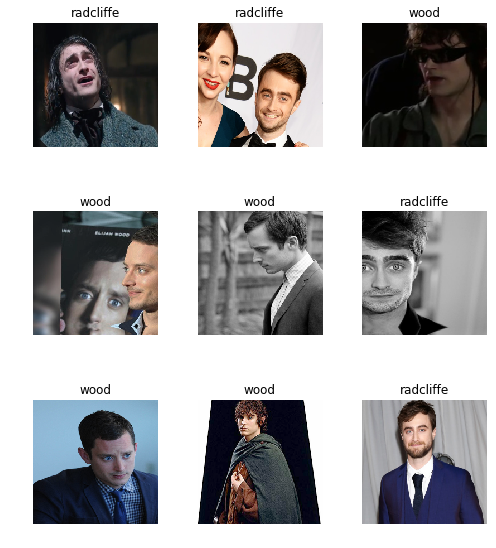

In [6]:
data.show_batch(rows=3, figsize=(7,8))

# Training the model (resnet34)

In [7]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [8]:
learn.fit_one_cycle(4)

Total time: 01:19
epoch  train_loss  valid_loss  error_rate
1      1.331695    1.277036    0.537415    (00:43)
2      0.987655    0.752296    0.238095    (00:12)
3      0.820048    0.558392    0.197279    (00:12)
4      0.668934    0.525659    0.190476    (00:11)



In [9]:
learn.save('stage-1')

# Results

In [10]:
interp = ClassificationInterpretation.from_learner(learn)

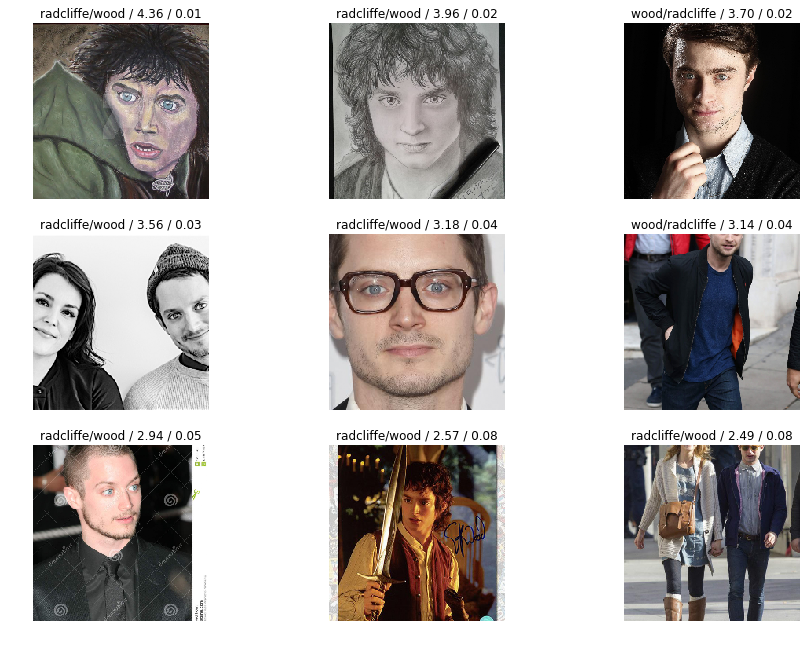

In [11]:
interp.plot_top_losses(9, figsize=(15,11))

## Unfreezing, fine-tuning, and learning rates

In [12]:
learn.unfreeze()

In [13]:
learn.fit_one_cycle(1)

Total time: 00:12
epoch  train_loss  valid_loss  error_rate
1      0.658092    3.831978    0.414966    (00:12)



In [14]:
learn.load('stage-1')

In [15]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


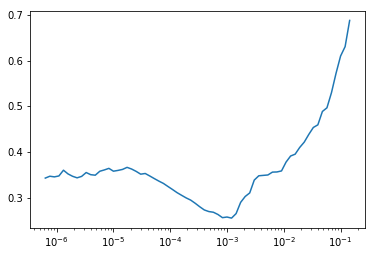

In [16]:
learn.recorder.plot()

In [17]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-4,1e-3))

Total time: 00:50
epoch  train_loss  valid_loss  error_rate
1      0.341375    0.264877    0.088435    (00:12)
2      0.297970    0.736818    0.142857    (00:12)
3      0.249315    0.349255    0.102041    (00:13)
4      0.210021    0.385619    0.108844    (00:12)



# Lets try resnet 50!

In [18]:
#Create the data with higher size and lower batch size
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=320, num_workers=4, bs=16).normalize(imagenet_stats)

In [19]:
learn50 = create_cnn(data, models.resnet50, metrics=error_rate)

In [20]:
learn50.fit_one_cycle(8, max_lr=slice(1e-3))

Total time: 02:10
epoch  train_loss  valid_loss  error_rate
1      1.189984    0.823438    0.341270    (00:25)
2      0.891481    0.578047    0.198413    (00:14)
3      0.701066    0.383833    0.103175    (00:15)
4      0.576468    0.358247    0.103175    (00:15)
5      0.399650    0.313426    0.111111    (00:15)
6      0.298779    0.315932    0.111111    (00:15)
7      0.255901    0.290014    0.095238    (00:14)
8      0.221324    0.315646    0.095238    (00:14)



In [21]:
learn50.save('stage-1-50')

In [22]:
learn50.unfreeze()
learn50.fit_one_cycle(4, max_lr=slice(1e-4,1e-3))

Total time: 01:16
epoch  train_loss  valid_loss  error_rate
1      0.339004    0.506185    0.150794    (00:20)
2      0.437324    0.366974    0.111111    (00:18)
3      0.306452    0.098642    0.039683    (00:17)
4      0.209996    0.054963    0.015873    (00:18)



In [23]:
interp = ClassificationInterpretation.from_learner(learn50)

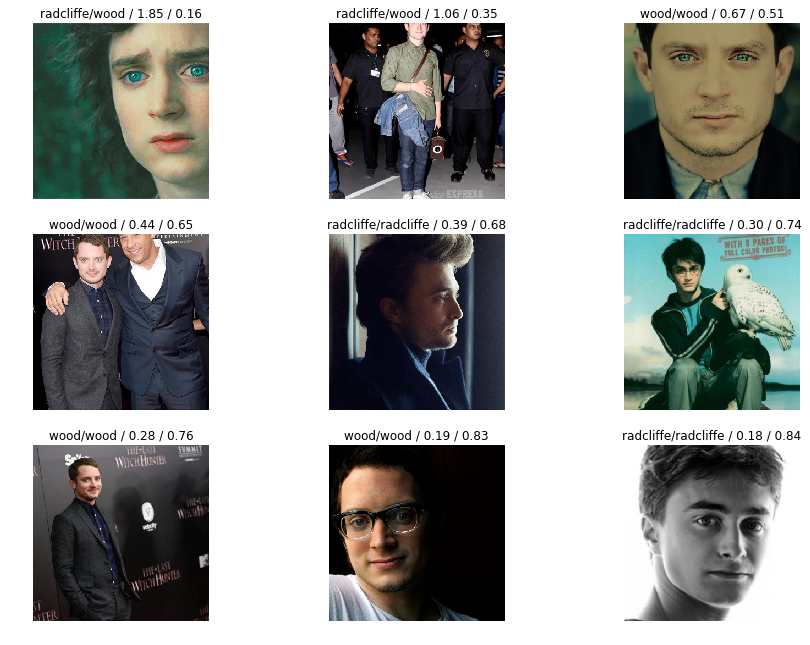

In [24]:
interp.plot_top_losses(9, figsize=(15,11))